### Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 

### Importing data 

In [ ]:
( x_train, y_train ), ( x_test, y_test ) = keras.datasets.mnist.load_data()

### Scaling data

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train_flat = x_train.reshape(len(x_train),x_train.shape[1]*x_train.shape[2])

### Training model : Neural Network without hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(x_train_flat,y_train,epochs = 5)

In [ ]:
x_test_flat = x_test.reshape(len(x_test),x_test.shape[1]*x_test.shape[2])
model.evaluate(x_test_flat,y_test)

In [ ]:
y_pred = model.predict(x_test_flat)

In [25]:
y_pred_labels = []
for i in range(0,len(y_pred)):
    y_pred_labels.append(np.argmax(y_pred[i]))

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

### Plotting confusion matrix 

Text(95.72222222222221, 0.5, 'Truth')

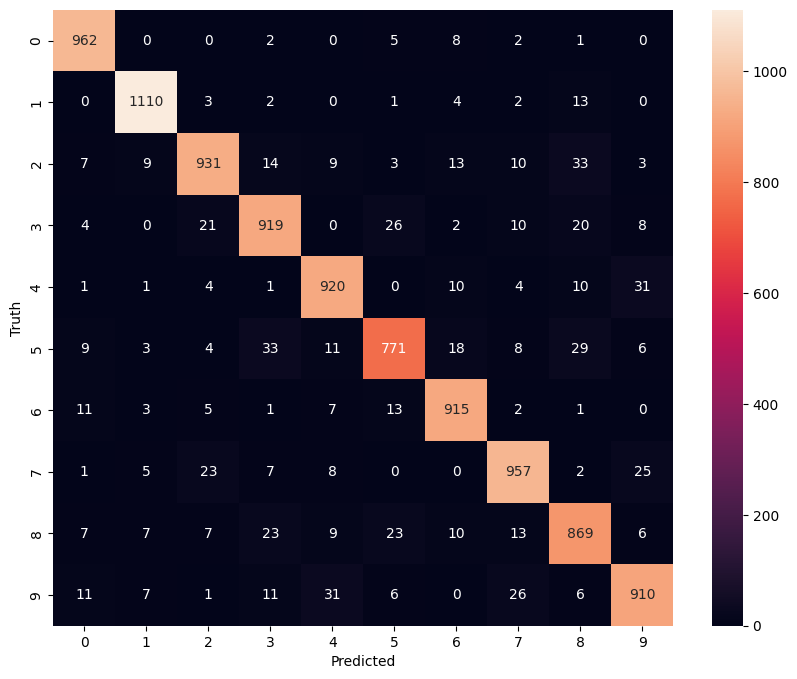

In [30]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Training model with a hidden layer 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(x_train_flat,y_train,epochs = 5)

In [ ]:
y_pred = model.predict(x_test_flat)

In [33]:
y_pred_labels = []
for i in range(0,len(y_pred)):
    y_pred_labels.append(np.argmax(y_pred[i]))

### Plotting confusion matrix 

Text(95.72222222222221, 0.5, 'Truth')

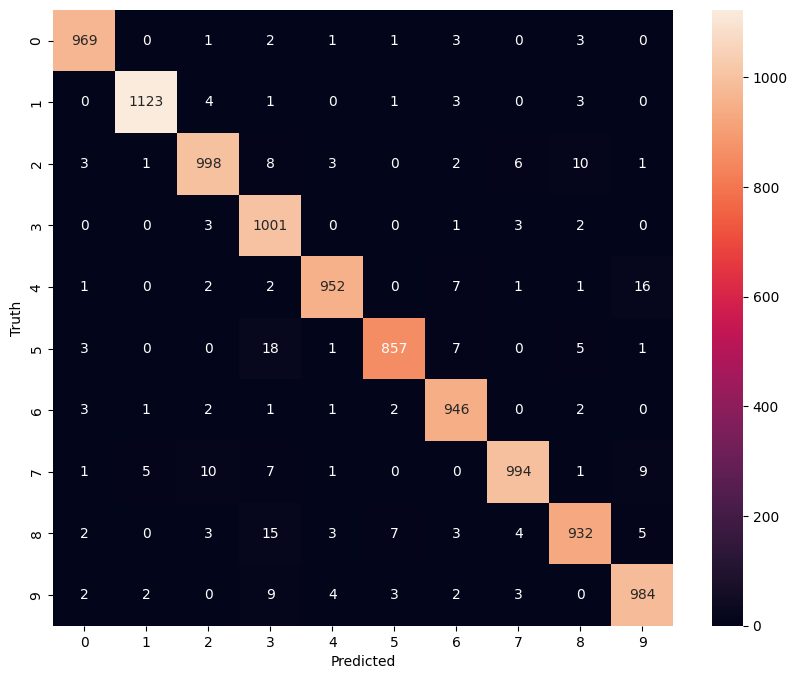

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')